## Missing image check

In [ ]:
# import os, json
# with open("/kaggle/input/json-karpathy-final/all.json") as f:
#     data = json.load(f)["images"]

# missing = [img["filename"] for img in data if not os.path.exists(f"/kaggle/input/captions-in-carpathy-and-all-images/images-20250517T073420Z-1-001/images/{img['filename']}")]
# print("Missing:", missing)

# Preprocessing

## Install dan import package

In [10]:
!pip install --quiet nltk pillow

import os
import json
import h5py
import numpy as np
from collections import Counter
from random import seed, choice, sample
from tqdm import tqdm
from nltk.tokenize import RegexpTokenizer
from PIL import Image

## Fungsi untuk membuat word map

In [ ]:
# def full_word_map(min_word_freq: int, json_path: str, output_path: str, dataset_basename: str):
#     with open(json_path, 'r') as f:
#         data = json.load(f)

#     word_freq = Counter()
#     for img in data['images']:
#         for c in img['sentences']:
#             word_freq.update(c['tokens'])

#     words = [w for w in word_freq.keys() if word_freq[w] > min_word_freq]
#     word_map = {k: v + 1 for v, k in enumerate(words)}
#     word_map['<unk>'] = len(word_map) + 1
#     word_map['<start>'] = len(word_map) + 1
#     word_map['<end>'] = len(word_map) + 1
#     word_map['<pad>'] = 0

#     with open(os.path.join(output_path, f'wordmap_{dataset_basename}.json'), 'w') as j:
#         json.dump(word_map, j)

#     return word_map

## Fungsi load & resize image

In [ ]:
# def load_image(path: str, size: int = 256):
#     image = Image.open(path).convert("RGB")
#     image = image.resize((size, size))
#     return np.asarray(image).transpose(2, 0, 1)

## Fungsi utama preprocess per aspek

In [ ]:
# def preprocess_aspect(json_path, image_folder, output_folder, word_map,
#                       base_filename, split, captions_per_image, max_len=100, resized_size=256):
#     with open(json_path, 'r') as f:
#         data = json.load(f)

#     image_paths, image_captions = [], []

#     for img in data['images']:
#         if img['split'] != split:
#             continue
#         captions = [c['tokens'] for c in img['sentences'] if len(c['tokens']) <= max_len]
#         if not captions:
#             continue
#         image_paths.append(os.path.join(image_folder, img['filename']))
#         image_captions.append(captions)

#     with h5py.File(os.path.join(output_folder, f'{split}_images_{base_filename}.hdf5'), 'w') as h:
#         h.attrs['captions_per_image'] = captions_per_image
#         images = h.create_dataset('images', (len(image_paths), 3, resized_size, resized_size), dtype='uint8')

#         encoded_captions = []
#         cap_lengths = []

#         for i, path in enumerate(tqdm(image_paths, desc=f"{split} images")):
#             if len(image_captions[i]) < captions_per_image:
#                 caps = image_captions[i] + [choice(image_captions[i]) for _ in range(captions_per_image - len(image_captions[i]))]
#             else:
#                 caps = sample(image_captions[i], k=captions_per_image)

#             assert len(caps) == captions_per_image
#             images[i] = load_image(path, size=resized_size)

#             for cap in caps:
#                 enc = [word_map['<start>']] + [word_map.get(w, word_map['<unk>']) for w in cap] + [word_map['<end>']]
#                 enc += [word_map['<pad>']] * (max_len - len(cap))
#                 encoded_captions.append(enc)
#                 cap_lengths.append(len(cap) + 2)

#         with open(os.path.join(output_folder, f'{split}_captions_{base_filename}.json'), 'w') as f:
#             json.dump(encoded_captions, f)
#         with open(os.path.join(output_folder, f'{split}_caplength_{base_filename}.json'), 'w') as f:
#             json.dump(cap_lengths, f)

## Run

In [ ]:
# # Konfigurasi
# dataset_basename = "all"
# json_path = "/kaggle/input/json-karpathy-final/all.json"
# image_folder = "/kaggle/input/captions-in-carpathy-and-all-images/images-20250517T073420Z-1-001/images"
# output_folder = "/kaggle/working/preprocessed_dataset"
# captions_per_image = 5
# max_len = 100
# min_word_freq = 5
# resized_size = 256

# # Siapkan folder output
# os.makedirs(output_folder, exist_ok=True)

# # Generate word_map dari full dataset
# word_map = full_word_map(min_word_freq, json_path, output_folder, dataset_basename)

# # Preprocessing untuk split train, val, test
# for split in ['train', 'val', 'test']:
#     preprocess_aspect(
#         json_path=json_path,
#         image_folder=image_folder,
#         output_folder=output_folder,
#         word_map=word_map,
#         base_filename=dataset_basename,
#         split=split,
#         captions_per_image=captions_per_image,
#         max_len=max_len,
#         resized_size=resized_size
#     )

In [ ]:
# # Konfigurasi
# dataset_basename = "color_light"
# json_path = "/kaggle/input/json-karpathy-final/color_light.json"
# image_folder = "/kaggle/input/captions-in-carpathy-and-all-images/images-20250517T073420Z-1-001/images"
# output_folder = "/kaggle/working/preprocessed_dataset"
# captions_per_image = 5
# max_len = 100
# min_word_freq = 5
# resized_size = 256

# # Siapkan folder output
# os.makedirs(output_folder, exist_ok=True)

# # Generate word_map dari full dataset
# word_map = full_word_map(min_word_freq, json_path, output_folder, dataset_basename)

# # Preprocessing untuk split train, val, test
# for split in ['train', 'val', 'test']:
#     preprocess_aspect(
#         json_path=json_path,
#         image_folder=image_folder,
#         output_folder=output_folder,
#         word_map=word_map,
#         base_filename=dataset_basename,
#         split=split,
#         captions_per_image=captions_per_image,
#         max_len=max_len,
#         resized_size=resized_size
#     )

In [ ]:
# # Konfigurasi
# dataset_basename = "composition"
# json_path = "/kaggle/input/json-karpathy-final/composition.json"
# image_folder = "/kaggle/input/captions-in-carpathy-and-all-images/images-20250517T073420Z-1-001/images"
# output_folder = "/kaggle/working/preprocessed_dataset"
# captions_per_image = 5
# max_len = 100
# min_word_freq = 5
# resized_size = 256

# # Siapkan folder output
# os.makedirs(output_folder, exist_ok=True)

# # Generate word_map dari full dataset
# word_map = full_word_map(min_word_freq, json_path, output_folder, dataset_basename)

# # Preprocessing untuk split train, val, test
# for split in ['train', 'val', 'test']:
#     preprocess_aspect(
#         json_path=json_path,
#         image_folder=image_folder,
#         output_folder=output_folder,
#         word_map=word_map,
#         base_filename=dataset_basename,
#         split=split,
#         captions_per_image=captions_per_image,
#         max_len=max_len,
#         resized_size=resized_size
#     )

In [ ]:
# # Konfigurasi
# dataset_basename = "dof_and_focus"
# json_path = "/kaggle/input/json-karpathy-final/dof_and_focus.json"
# image_folder = "/kaggle/input/captions-in-carpathy-and-all-images/images-20250517T073420Z-1-001/images"
# output_folder = "/kaggle/working/preprocessed_dataset"
# captions_per_image = 5
# max_len = 100
# min_word_freq = 5
# resized_size = 256

# # Siapkan folder output
# os.makedirs(output_folder, exist_ok=True)

# # Generate word_map dari full dataset
# word_map = full_word_map(min_word_freq, json_path, output_folder, dataset_basename)

# # Preprocessing untuk split train, val, test
# for split in ['train', 'val', 'test']:
#     preprocess_aspect(
#         json_path=json_path,
#         image_folder=image_folder,
#         output_folder=output_folder,
#         word_map=word_map,
#         base_filename=dataset_basename,
#         split=split,
#         captions_per_image=captions_per_image,
#         max_len=max_len,
#         resized_size=resized_size
#     )

In [ ]:
# # Konfigurasi
# dataset_basename = "general_impression"
# json_path = "/kaggle/input/json-karpathy-final/general_impression.json"
# image_folder = "/kaggle/input/captions-in-carpathy-and-all-images/images-20250517T073420Z-1-001/images"
# output_folder = "/kaggle/working/preprocessed_dataset"
# captions_per_image = 5
# max_len = 100
# min_word_freq = 5
# resized_size = 256

# # Siapkan folder output
# os.makedirs(output_folder, exist_ok=True)

# # Generate word_map dari full dataset
# word_map = full_word_map(min_word_freq, json_path, output_folder, dataset_basename)

# # Preprocessing untuk split train, val, test
# for split in ['train', 'val', 'test']:
#     preprocess_aspect(
#         json_path=json_path,
#         image_folder=image_folder,
#         output_folder=output_folder,
#         word_map=word_map,
#         base_filename=dataset_basename,
#         split=split,
#         captions_per_image=captions_per_image,
#         max_len=max_len,
#         resized_size=resized_size
#     )

In [ ]:
# # Konfigurasi
# dataset_basename = "subject"
# json_path = "/kaggle/input/json-karpathy-final/subject.json"
# image_folder = "/kaggle/input/captions-in-carpathy-and-all-images/images-20250517T073420Z-1-001/images"
# output_folder = "/kaggle/working/preprocessed_dataset"
# captions_per_image = 5
# max_len = 100
# min_word_freq = 5
# resized_size = 256

# # Siapkan folder output
# os.makedirs(output_folder, exist_ok=True)

# # Generate word_map dari full dataset
# word_map = full_word_map(min_word_freq, json_path, output_folder, dataset_basename)

# # Preprocessing untuk split train, val, test
# for split in ['train', 'val', 'test']:
#     preprocess_aspect(
#         json_path=json_path,
#         image_folder=image_folder,
#         output_folder=output_folder,
#         word_map=word_map,
#         base_filename=dataset_basename,
#         split=split,
#         captions_per_image=captions_per_image,
#         max_len=max_len,
#         resized_size=resized_size
#     )

In [ ]:
# # Konfigurasi
# dataset_basename = "use_of_camera"
# json_path = "/kaggle/input/json-karpathy-final/use_of_camera.json"
# image_folder = "/kaggle/input/captions-in-carpathy-and-all-images/images-20250517T073420Z-1-001/images"
# output_folder = "/kaggle/working/preprocessed_dataset"
# captions_per_image = 5
# max_len = 100
# min_word_freq = 5
# resized_size = 256

# # Siapkan folder output
# os.makedirs(output_folder, exist_ok=True)

# # Generate word_map dari full dataset
# word_map = full_word_map(min_word_freq, json_path, output_folder, dataset_basename)

# # Preprocessing untuk split train, val, test
# for split in ['train', 'val', 'test']:
#     preprocess_aspect(
#         json_path=json_path,
#         image_folder=image_folder,
#         output_folder=output_folder,
#         word_map=word_map,
#         base_filename=dataset_basename,
#         split=split,
#         captions_per_image=captions_per_image,
#         max_len=max_len,
#         resized_size=resized_size
#     )

In [ ]:
# import shutil
# shutil.make_archive("/kaggle/working/preprocessed_dataset", 'zip', "/kaggle/working/preprocessed_dataset")

# CNN-LSTM Building

In [ ]:
import torch
torch.cuda.empty_cache()

## Load GloVe Embedding

In [4]:
import numpy as np
import torch

def load_glove_embeddings(glove_path, word_map, embedding_dim=300):
    embeddings_index = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector

    vocab_size = len(word_map)
    embedding_matrix = np.random.uniform(-0.1, 0.1, (vocab_size, embedding_dim)).astype(np.float32)

    for word, idx in word_map.items():
        if word in embeddings_index:
            embedding_matrix[idx] = embeddings_index[word]

    print("✅ Loaded GloVe. Covered:", sum(1 for w in word_map if w in embeddings_index))
    return torch.tensor(embedding_matrix)

## Pretrain: Dataset Class + DataLoader 

In [5]:
class CaptionDataset(torch.utils.data.Dataset):
    def __init__(self, data_folder, data_name, split, transform=None):
        self.split = split
        self.transform = transform

        import h5py
        self.h = h5py.File(os.path.join(data_folder, f"{split}_images_{data_name}.hdf5"), 'r')
        self.imgs = self.h['images']
        self.cpi = self.h.attrs['captions_per_image']

        with open(os.path.join(data_folder, f"{split}_captions_{data_name}.json"), 'r') as j:
            self.captions = json.load(j)
        with open(os.path.join(data_folder, f"{split}_caplength_{data_name}.json"), 'r') as j:
            self.caplens = json.load(j)

        self.dataset_size = len(self.captions)

    def __getitem__(self, i: int):
        img = torch.FloatTensor(self.imgs[i // self.cpi] / 255.)
        if self.transform is not None:
            img = self.transform(img)

        caption = torch.LongTensor(self.captions[i])
        caplen = torch.LongTensor([self.caplens[i]])

        if self.split == 'train':
            return img, caption, caplen
        else:
            all_captions = torch.LongTensor(
                self.captions[((i // self.cpi) * self.cpi):(((i // self.cpi) * self.cpi) + self.cpi)]
            )
            return img, caption, caplen, all_captions

    def __len__(self):
        return self.dataset_size

In [6]:
def get_loader(data_folder, data_name, split, batch_size=32, num_workers=2):
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        normalize
    ])

    dataset = CaptionDataset(
        data_folder=data_folder,
        data_name=data_name,
        split=split,
        transform=transform
    )

    loader = DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        shuffle=(split == 'train'),
        num_workers=num_workers,
        pin_memory=True
    )

    return loader

## Pretrain: Encoder-Decoder CNN-LSTM Model

In [7]:
import torch
import torch.nn as nn
import torchvision.models as models


class EncoderCNN(nn.Module):
    def __init__(self, encoded_image_size=14):
        super(EncoderCNN, self).__init__()
        self.enc_image_size = encoded_image_size
        self.encoder_dim = 2048

        # Load pretrained ResNet101
        resnet = models.resnet101(weights='DEFAULT')
        modules = list(resnet.children())[:-2]  # Remove average pool & fc
        self.resnet = nn.Sequential(*modules)

        self.adaptive_pool = nn.AdaptiveAvgPool2d((encoded_image_size, encoded_image_size))

        self.fine_tune()

    def forward(self, images):
        out = self.resnet(images)               # (batch, 2048, H, W)
        out = self.adaptive_pool(out)           # (batch, 2048, 14, 14)
        out = out.permute(0, 2, 3, 1)           # (batch, 14, 14, 2048)
        out = out.view(out.size(0), -1, out.size(-1))  # (batch, num_pixels, 2048)
        return out

    def fine_tune(self, fine_tune=True):
        for p in self.resnet.parameters():
            p.requires_grad = False
        # Unfreeze last layer blocks for finetuning if needed
        for c in list(self.resnet.children())[5:]:
            for p in c.parameters():
                p.requires_grad = fine_tune


class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, attention_dim=512, encoder_dim=2048,
                 dropout=0.5, pretrained_embeddings=None, freeze_embeddings=False):
        super(DecoderRNN, self).__init__()

        self.encoder_dim = encoder_dim
        self.embed_size = embed_size
        self.hidden_size = hidden_size
        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embed_size)
        if pretrained_embeddings is not None:
            self.embedding.weight = nn.Parameter(pretrained_embeddings)
            self.embedding.weight.requires_grad = not freeze_embeddings
        else:
            self.embedding.weight.data.uniform_(-0.1, 0.1)

        self.dropout = nn.Dropout(p=dropout)
        self.init_h = nn.Linear(encoder_dim, hidden_size)
        self.init_c = nn.Linear(encoder_dim, hidden_size)
        self.lstm = nn.LSTMCell(embed_size + encoder_dim, hidden_size, bias=True)
        self.f_beta = nn.Linear(hidden_size, encoder_dim)
        self.fc = nn.Linear(hidden_size, vocab_size)
        self.init_weights()

    def init_weights(self):
        self.fc.bias.data.fill_(0)
        self.fc.weight.data.uniform_(-0.1, 0.1)

    def init_hidden_state(self, encoder_out):
        mean_encoder_out = encoder_out.mean(dim=1)
        h = self.init_h(mean_encoder_out)
        c = self.init_c(mean_encoder_out)
        return h, c

    def forward(self, encoder_out, captions, caplens):
        batch_size = encoder_out.size(0)
        vocab_size = self.vocab_size

        encoder_out = encoder_out.view(batch_size, -1, self.encoder_dim)
        num_pixels = encoder_out.size(1)

        caplens, sort_ind = caplens.squeeze(1).sort(dim=0, descending=True)
        encoder_out = encoder_out[sort_ind]
        captions = captions[sort_ind]

        embeddings = self.embedding(captions)

        h, c = self.init_hidden_state(encoder_out)

        decode_lengths = (caplens - 1).tolist()
        predictions = torch.zeros(batch_size, max(decode_lengths), vocab_size).to(encoder_out.device)

        for t in range(max(decode_lengths)):
            batch_size_t = sum([l > t for l in decode_lengths])
            attention_weighted_encoding = encoder_out[:batch_size_t].mean(dim=1)
            input_lstm = torch.cat([embeddings[:batch_size_t, t, :], attention_weighted_encoding], dim=1)
            h, c = self.lstm(input_lstm, (h[:batch_size_t], c[:batch_size_t]))
            preds = self.fc(self.dropout(h))
            predictions[:batch_size_t, t, :] = preds

        return predictions, captions, decode_lengths, sort_ind

## Pretrain: Training, Eval, and Save checkpoint func.

In [8]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence
from tqdm import tqdm

def train_epoch(train_loader, encoder, decoder, criterion, encoder_optimizer, decoder_optimizer, device, grad_clip=5.0):
    encoder.train()
    decoder.train()
    total_loss = 0.0

    for imgs, caps, caplens in tqdm(train_loader, desc="Training", leave=False):
        imgs, caps, caplens = imgs.to(device), caps.to(device), caplens.to(device)

        encoder_out = encoder(imgs)
        scores, caps_sorted, decode_lengths, sort_ind = decoder(encoder_out, caps, caplens)

        targets = caps_sorted[:, 1:]
        scores_packed = nn.utils.rnn.pack_padded_sequence(scores, decode_lengths, batch_first=True).data
        targets_packed = nn.utils.rnn.pack_padded_sequence(targets, decode_lengths, batch_first=True).data

        loss = criterion(scores_packed, targets_packed)

        decoder_optimizer.zero_grad()
        encoder_optimizer.zero_grad()
        loss.backward()

        # 🚨 Gradient clipping
        torch.nn.utils.clip_grad_norm_(decoder.parameters(), grad_clip)
        torch.nn.utils.clip_grad_norm_(encoder.parameters(), grad_clip)

        decoder_optimizer.step()
        encoder_optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)


def evaluate(val_loader, encoder, decoder, criterion, device):
    encoder.eval()
    decoder.eval()

    total_loss = 0.0

    with torch.no_grad():
        for imgs, caps, caplens, _ in tqdm(val_loader, desc="Evaluating", leave=False):
            imgs, caps, caplens = imgs.to(device), caps.to(device), caplens.to(device)

            encoder_out = encoder(imgs)
            scores, caps_sorted, decode_lengths, sort_ind = decoder(encoder_out, caps, caplens)

            targets = caps_sorted[:, 1:]
            scores_packed = nn.utils.rnn.pack_padded_sequence(scores, decode_lengths, batch_first=True).data
            targets_packed = nn.utils.rnn.pack_padded_sequence(targets, decode_lengths, batch_first=True).data

            loss = criterion(scores_packed, targets_packed)
            total_loss += loss.item()

    return total_loss / len(val_loader)


def save_checkpoint(model_name, epoch, encoder, decoder, encoder_optimizer, decoder_optimizer, val_loss, output_dir):
    state = {
        "epoch": epoch,
        "val_loss": val_loss,
        "encoder": encoder.state_dict(),
        "decoder": decoder.state_dict(),
        "encoder_optimizer": encoder_optimizer.state_dict(),
        "decoder_optimizer": decoder_optimizer.state_dict()
    }
    torch.save(state, f"{output_dir}/{model_name}_epoch{epoch}.pth")
    print(f"✅ Saved checkpoint: {model_name}_epoch{epoch}.pth")

## Pretrain: with COCO Datasets (Food Only)

In [ ]:
import os
import json
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# --- Path & Config ---
data_name = "coco_food"
data_folder = "/kaggle/input/ta-arif-nugraha-santosa-coco-preprocess/pretrain_coco_food"
word_map_path = os.path.join(data_folder, "wordmap_coco_food.json")
glove_path = "/kaggle/input/glove6b300dtxt/glove.6B.300d.txt"
output_dir = "/kaggle/working/pretrain_models_glove"
os.makedirs(output_dir, exist_ok=True)

# --- Hyperparameters ---
with open(word_map_path, "r") as j:
    word_map = json.load(j)
vocab_size = len(word_map)
embed_size = 300  # match GloVe
hidden_size = 512
learning_rate = 1e-3
batch_size = 32
num_epochs = 20
patience = 3  # early stopping
grad_clip = 5.0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Transform ---
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# --- Loaders ---
train_loader = get_loader(data_folder, data_name, 'train', batch_size=batch_size)
val_loader = get_loader(data_folder, data_name, 'val', batch_size=batch_size)

# Load GloVe into decoder
embedding_matrix = load_glove_embeddings(glove_path, word_map, embed_size)

# --- Model ---
encoder = EncoderCNN().to(device)
decoder = DecoderRNN(
    embed_size=embed_size,
    hidden_size=hidden_size,
    vocab_size=vocab_size,
    pretrained_embeddings=embedding_matrix,
    freeze_embeddings=False
).to(device)

# --- Loss & Optimizer ---
criterion = nn.CrossEntropyLoss().to(device)
encoder_optimizer = optim.Adam(filter(lambda p: p.requires_grad, encoder.parameters()), lr=learning_rate)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate)

# --- Training Loop ---
best_val_loss = float('inf')
no_improve = 0

for epoch in range(num_epochs):
    print(f"\n🌀 Epoch {epoch + 1}/{num_epochs}")
    
    train_loss = train_epoch(train_loader, encoder, decoder, criterion, encoder_optimizer, decoder_optimizer, device, grad_clip=grad_clip)
    val_loss = evaluate(val_loader, encoder, decoder, criterion, device)

    print(f"✅ Train Loss: {train_loss:.4f} | 🔍 Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improve = 0
        save_checkpoint("pretrain_coco_food", epoch+1, encoder, decoder, encoder_optimizer, decoder_optimizer, val_loss, output_dir)
    else:
        no_improve += 1
        print(f"⚠️ No improvement ({no_improve}/{patience})")
        if no_improve >= patience:
            print("🛑 Early stopping triggered.")
            break

## Pretrain: Test

### Setup Paths dan Data

In [31]:
import os
import json
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# Paths
data_folder = "/kaggle/input/ta-arif-nugraha-santosa-coco-preprocess/pretrain_coco_food"
karpathy_json = "/kaggle/input/ta-arif-nugraha-santosa-coco-preprocess/coco_food_karpathy.json"
word_map_path = os.path.join(data_folder, "wordmap_coco_food.json")
checkpoint_path = "/kaggle/input/ta-arif-nugraha-santosa-preprocessing-cnn-lstm/pretrain_models_glove/pretrain_coco_food_epoch4.pth"  # Ganti dengan path model terbaikmu

# Load word map
with open(word_map_path, "r") as j:
    word_map = json.load(j)

# Load filenames for test split
with open(karpathy_json, "r") as f:
    filenames = [img["filename"] for img in json.load(f)["images"] if img["split"] == "test"]

### Dataset & DataLoader untuk Test

In [32]:
from torch.utils.data import Dataset
import h5py
import torch

class CocoFoodTestDataset(Dataset):
    def __init__(self, data_folder, filenames, transform=None):
        self.h = h5py.File(os.path.join(data_folder, "test_images_coco_food.hdf5"), "r")
        self.imgs = self.h["images"]
        self.cpi = self.h.attrs["captions_per_image"]
        self.transform = transform
        self.filenames = filenames

        with open(os.path.join(data_folder, "test_captions_coco_food.json")) as f:
            self.captions = json.load(f)
        with open(os.path.join(data_folder, "test_caplength_coco_food.json")) as f:
            self.caplens = json.load(f)

    def __getitem__(self, idx):
        img = torch.FloatTensor(self.imgs[idx // self.cpi] / 255.)
        if self.transform:
            img = self.transform(img)
        caption = torch.LongTensor(self.captions[idx])
        caplen = torch.LongTensor([self.caplens[idx]])
        fname = self.filenames[idx // self.cpi]
        return img, caption, caplen, fname

    def __len__(self):
        return len(self.captions)

### Load Model Pretrain

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

encoder = EncoderCNN().to(device)
decoder = DecoderRNN(embed_size=300, hidden_size=512, vocab_size=len(word_map)).to(device)

checkpoint = torch.load(checkpoint_path, map_location=device)
encoder.load_state_dict(checkpoint["encoder"])
decoder.load_state_dict(checkpoint["decoder"])
encoder.eval()
decoder.eval()

DecoderRNN(
  (embedding): Embedding(4718, 300)
  (dropout): Dropout(p=0.5, inplace=False)
  (init_h): Linear(in_features=2048, out_features=512, bias=True)
  (init_c): Linear(in_features=2048, out_features=512, bias=True)
  (lstm): LSTMCell(2348, 512)
  (f_beta): Linear(in_features=512, out_features=2048, bias=True)
  (fc): Linear(in_features=512, out_features=4718, bias=True)
)

### Generate Predictions

In [35]:
def generate_predictions(encoder, decoder, loader, word_map, device):
    idx2word = {v: k for k, v in word_map.items()}
    predictions = {}

    with torch.no_grad():
        for img, _, _, fname in tqdm(loader, desc="🔍 Generating"):
            img = img.to(device)
            encoder_out = encoder(img)
            encoder_out = encoder_out.view(1, -1, encoder.encoder_dim)

            h, c = decoder.init_hidden_state(encoder_out)
            word = torch.LongTensor([word_map['<start>']]).to(device)

            seq = []
            for _ in range(50):
                embeddings = decoder.embedding(word).squeeze(1)
                awe = encoder_out.mean(dim=1)
                h, c = decoder.lstm(torch.cat([embeddings, awe], dim=1), (h, c))
                preds = decoder.fc(h)
                word = preds.argmax(1, keepdim=True)
                word_id = word.item()
                if word_id == word_map['<end>']:
                    break
                seq.append(idx2word.get(word_id, '<unk>'))

            predictions[fname[0]] = seq
    return predictions

### Hitung BLEU Score

In [36]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

def load_references(json_path):
    with open(json_path, "r") as f:
        data = json.load(f)["images"]
    refs = {}
    for img in data:
        if img["split"] != "test":
            continue
        refs[img["filename"]] = [s["tokens"] for s in img["sentences"]]
    return refs

def evaluate_bleu(references, predictions):
    refs = []
    hyps = []
    for fname in predictions:
        if fname in references:
            refs.append(references[fname])
            hyps.append(predictions[fname])
    cc = SmoothingFunction()
    return {
        "BLEU-1": corpus_bleu(refs, hyps, weights=(1, 0, 0, 0), smoothing_function=cc.method1),
        "BLEU-2": corpus_bleu(refs, hyps, weights=(0.5, 0.5, 0, 0), smoothing_function=cc.method1),
        "BLEU-3": corpus_bleu(refs, hyps, weights=(0.33, 0.33, 0.33, 0), smoothing_function=cc.method1),
        "BLEU-4": corpus_bleu(refs, hyps, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=cc.method1),
    }

In [37]:
# Loader
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_dataset = CocoFoodTestDataset(data_folder, filenames, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=2)

# Prediksi & Evaluasi
preds = generate_predictions(encoder, decoder, test_loader, word_map, device)
refs = load_references("/kaggle/input/ta-arif-nugraha-santosa-coco-preprocess/coco_food_karpathy.json")
bleu_scores = evaluate_bleu(refs, preds)

print("📊 BLEU Scores:")
for k, v in bleu_scores.items():
    print(f"{k}: {v:.4f}")

🔍 Generating: 100%|██████████| 11630/11630 [03:38<00:00, 53.26it/s]


📊 BLEU Scores:
BLEU-1: 0.6251
BLEU-2: 0.4557
BLEU-3: 0.3291
BLEU-4: 0.2346


## Load Pretrain Checkpoint and Fine-Tune

In [ ]:
# import os
# import json
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader
# from torchvision import transforms
# from tqdm import tqdm

# # =========================================
# # 🔧 CONFIGURASI
# # =========================================
# aspects = ["color_light", "composition", "dof_and_focus", "general_impression", "subject", "use_of_camera"]
# data_folder = "/kaggle/input/ta-arif-nugraha-santosa-preprocessing-cnn-lstm/preprocessed_dataset"
# word_map_path = os.path.join(data_folder, "wordmap_all.json")
# pretrain_ckpt = "/kaggle/working/pretrain_models/pretrain_coco_food_epoch5.pth"
# output_dir = "/kaggle/working/fine_tuned_models"
# os.makedirs(output_dir, exist_ok=True)

# # =========================================
# # ⚙️ HYPERPARAMETER
# # =========================================
# vocab_size = len(json.load(open(word_map_path)))
# embed_size = 512
# hidden_size = 512
# learning_rate = 1e-3
# batch_size = 32
# num_epochs = 5

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # =========================================
# # 📦 TRANSFORM IMAGE
# # =========================================
# transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
# ])

# # =========================================
# # 📚 DATASET & DATALOADER
# # =========================================
# class CaptionDataset(torch.utils.data.Dataset):
#     def __init__(self, data_folder, data_name, split, transform=None):
#         self.split = split
#         self.transform = transform

#         import h5py
#         self.h = h5py.File(os.path.join(data_folder, f"{split}_images_{data_name}.hdf5"), 'r')
#         self.imgs = self.h['images']
#         self.cpi = self.h.attrs['captions_per_image']

#         with open(os.path.join(data_folder, f"{split}_captions_{data_name}.json"), 'r') as j:
#             self.captions = json.load(j)
#         with open(os.path.join(data_folder, f"{split}_caplength_{data_name}.json"), 'r') as j:
#             self.caplens = json.load(j)

#     def __getitem__(self, i):
#         img = torch.FloatTensor(self.imgs[i // self.cpi] / 255.)
#         if self.transform is not None:
#             img = self.transform(img)

#         caption = torch.LongTensor(self.captions[i])
#         caplen = torch.LongTensor([self.caplens[i]])

#         if self.split == 'train':
#             return img, caption, caplen
#         else:
#             all_captions = torch.LongTensor(
#                 self.captions[((i // self.cpi) * self.cpi):(((i // self.cpi) * self.cpi) + self.cpi)]
#             )
#             return img, caption, caplen, all_captions

#     def __len__(self):
#         return len(self.captions)

# # =========================================
# # 🧠 MODEL DEFINITION
# # =========================================
# import torchvision.models as models

# class EncoderCNN(nn.Module):
#     def __init__(self, encoded_image_size=14):
#         super(EncoderCNN, self).__init__()
#         resnet = models.resnet101(weights='DEFAULT')
#         modules = list(resnet.children())[:-2]
#         self.resnet = nn.Sequential(*modules)
#         self.adaptive_pool = nn.AdaptiveAvgPool2d((encoded_image_size, encoded_image_size))
#         self.fine_tune()

#     def forward(self, images):
#         out = self.resnet(images)
#         out = self.adaptive_pool(out)
#         out = out.permute(0, 2, 3, 1)
#         return out.view(out.size(0), -1, out.size(-1))

#     def fine_tune(self, fine_tune=True):
#         for p in self.resnet.parameters():
#             p.requires_grad = False
#         for c in list(self.resnet.children())[5:]:
#             for p in c.parameters():
#                 p.requires_grad = fine_tune

# class DecoderRNN(nn.Module):
#     def __init__(self, embed_size, hidden_size, vocab_size, attention_dim=512, encoder_dim=2048, dropout=0.5):
#         super(DecoderRNN, self).__init__()
#         self.encoder_dim = encoder_dim
#         self.embed_size = embed_size
#         self.hidden_size = hidden_size
#         self.vocab_size = vocab_size

#         self.embedding = nn.Embedding(vocab_size, embed_size)
#         self.dropout = nn.Dropout(p=dropout)
#         self.init_h = nn.Linear(encoder_dim, hidden_size)
#         self.init_c = nn.Linear(encoder_dim, hidden_size)
#         self.lstm = nn.LSTMCell(embed_size + encoder_dim, hidden_size)
#         self.fc = nn.Linear(hidden_size, vocab_size)

#         self.init_weights()

#     def init_weights(self):
#         self.embedding.weight.data.uniform_(-0.1, 0.1)
#         self.fc.bias.data.fill_(0)
#         self.fc.weight.data.uniform_(-0.1, 0.1)

#     def init_hidden_state(self, encoder_out):
#         mean_encoder_out = encoder_out.mean(dim=1)
#         return self.init_h(mean_encoder_out), self.init_c(mean_encoder_out)

#     def forward(self, encoder_out, captions, caplens):
#         batch_size = encoder_out.size(0)
#         encoder_out = encoder_out.view(batch_size, -1, self.encoder_dim)

#         caplens, sort_ind = caplens.squeeze(1).sort(dim=0, descending=True)
#         encoder_out = encoder_out[sort_ind]
#         captions = captions[sort_ind]
#         embeddings = self.embedding(captions)

#         h, c = self.init_hidden_state(encoder_out)
#         decode_lengths = (caplens - 1).tolist()
#         predictions = torch.zeros(batch_size, max(decode_lengths), self.vocab_size).to(encoder_out.device)

#         for t in range(max(decode_lengths)):
#             batch_size_t = sum([l > t for l in decode_lengths])
#             attention = encoder_out[:batch_size_t].mean(dim=1)
#             lstm_input = torch.cat([embeddings[:batch_size_t, t, :], attention], dim=1)
#             h, c = self.lstm(lstm_input, (h[:batch_size_t], c[:batch_size_t]))
#             preds = self.fc(self.dropout(h))
#             predictions[:batch_size_t, t, :] = preds

#         return predictions, captions, decode_lengths, sort_ind

# # =========================================
# # ✅ LOAD CHECKPOINT PRETRAINED
# # =========================================
# def load_checkpoint_for_finetune(checkpoint_path, encoder, decoder):
#     ckpt = torch.load(checkpoint_path, map_location=device)
#     encoder.load_state_dict(ckpt['encoder'])
#     decoder.load_state_dict(ckpt['decoder'])
#     print("✅ Loaded pretrained weights.")

# # =========================================
# # 🏋️ TRAINING & EVALUATION FUNCTION
# # =========================================
# def train_epoch(loader, encoder, decoder, criterion, enc_opt, dec_opt, device):
#     encoder.train()
#     decoder.train()
#     total_loss = 0
#     for imgs, caps, caplens in tqdm(loader, desc="Training", leave=False):
#         imgs, caps, caplens = imgs.to(device), caps.to(device), caplens.to(device)
#         enc_out = encoder(imgs)
#         scores, caps_sorted, decode_lengths, _ = decoder(enc_out, caps, caplens)
#         targets = caps_sorted[:, 1:]
#         scores = nn.utils.rnn.pack_padded_sequence(scores, decode_lengths, batch_first=True).data
#         targets = nn.utils.rnn.pack_padded_sequence(targets, decode_lengths, batch_first=True).data

#         loss = criterion(scores, targets)
#         dec_opt.zero_grad()
#         if enc_opt: enc_opt.zero_grad()
#         loss.backward()
#         dec_opt.step()
#         if enc_opt: enc_opt.step()
#         total_loss += loss.item()
#     return total_loss / len(loader)

# def evaluate(loader, encoder, decoder, criterion, device):
#     encoder.eval()
#     decoder.eval()
#     total_loss = 0
#     with torch.no_grad():
#         for imgs, caps, caplens, _ in tqdm(loader, desc="Evaluating", leave=False):
#             imgs, caps, caplens = imgs.to(device), caps.to(device), caplens.to(device)
#             enc_out = encoder(imgs)
#             scores, caps_sorted, decode_lengths, _ = decoder(enc_out, caps, caplens)
#             targets = caps_sorted[:, 1:]
#             scores = nn.utils.rnn.pack_padded_sequence(scores, decode_lengths, batch_first=True).data
#             targets = nn.utils.rnn.pack_padded_sequence(targets, decode_lengths, batch_first=True).data
#             loss = criterion(scores, targets)
#             total_loss += loss.item()
#     return total_loss / len(loader)

# def save_checkpoint(name, epoch, encoder, decoder, enc_opt, dec_opt, val_loss, output_dir):
#     state = {
#         "epoch": epoch,
#         "val_loss": val_loss,
#         "encoder": encoder.state_dict(),
#         "decoder": decoder.state_dict(),
#         "encoder_optimizer": enc_opt.state_dict(),
#         "decoder_optimizer": dec_opt.state_dict()
#     }
#     torch.save(state, os.path.join(output_dir, f"{name}_epoch{epoch}.pth"))
#     print(f"✅ Saved: {name}_epoch{epoch}.pth")

# # =========================================
# # 🔁 FINE-TUNING PER ASPEK
# # =========================================
# for aspect in aspects:
#     print(f"\n📌 Fine-tuning for aspect: {aspect}")

#     train_loader = DataLoader(CaptionDataset(data_folder, aspect, 'train', transform),
#                               batch_size=batch_size, shuffle=True, num_workers=2)
#     val_loader = DataLoader(CaptionDataset(data_folder, aspect, 'val', transform),
#                             batch_size=batch_size, shuffle=False, num_workers=2)

#     encoder = EncoderCNN().to(device)
#     decoder = DecoderRNN(embed_size, hidden_size, vocab_size).to(device)
#     load_checkpoint_for_finetune(pretrain_ckpt, encoder, decoder)

#     criterion = nn.CrossEntropyLoss().to(device)
#     encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
#     decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate)

#     best_val_loss = float("inf")
#     for epoch in range(num_epochs):
#         print(f"\n🌀 Epoch {epoch+1}/{num_epochs}")
#         train_loss = train_epoch(train_loader, encoder, decoder, criterion,
#                                  encoder_optimizer, decoder_optimizer, device)
#         val_loss = evaluate(val_loader, encoder, decoder, criterion, device)
#         print(f"✅ Train Loss: {train_loss:.4f} | 🔍 Val Loss: {val_loss:.4f}")

#         if val_loss < best_val_loss:
#             best_val_loss = val_loss
#             save_checkpoint(aspect, epoch+1, encoder, decoder,
#                             encoder_optimizer, decoder_optimizer,
#                             val_loss, output_dir)

## Inference Test

In [38]:
import torch
import json
from PIL import Image
from torchvision import transforms

def load_model_and_wordmap(checkpoint_path, word_map_path, device, embed_size=300, hidden_size=512):
    with open(word_map_path, 'r') as j:
        word_map = json.load(j)
    vocab_size = len(word_map)

    # Load checkpoint
    checkpoint = torch.load(checkpoint_path, map_location=device)

    # Init model
    encoder = EncoderCNN().to(device)
    decoder = DecoderRNN(embed_size, hidden_size, vocab_size).to(device)

    encoder.load_state_dict(checkpoint['encoder'])
    decoder.load_state_dict(checkpoint['decoder'])
    encoder.eval()
    decoder.eval()

    return encoder, decoder, word_map

In [53]:
def caption_image(image, encoder, decoder, word_map, device, max_len=50):
    encoder.eval()
    decoder.eval()

    # Transformasi gambar
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

    # Proses gambar
    image = transform(image).unsqueeze(0).to(device)  # (1, 3, 256, 256)

    with torch.no_grad():
        encoder_out = encoder(image)  # (1, num_pixels, encoder_dim)
        encoder_out = encoder_out.view(1, -1, encoder.encoder_dim)
        h, c = decoder.init_hidden_state(encoder_out)

        word_map_rev = {v: k for k, v in word_map.items()}
        seq = []
        word = torch.LongTensor([word_map['<start>']]).to(device)

        for _ in range(max_len):
            embeddings = decoder.embedding(word).squeeze(1)
            awe = encoder_out.mean(dim=1)
            h, c = decoder.lstm(torch.cat([embeddings, awe], dim=1), (h, c))
            preds = decoder.fc(h)
            word = preds.argmax(1, keepdim=True)
            word_id = word.item()

            if word_id == word_map['<end>']:
                break
            seq.append(word_map_rev.get(word_id, '<unk>'))

    return ' '.join(seq)

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint_path = "/kaggle/input/ta-arif-nugraha-santosa-preprocessing-cnn-lstm/pretrain_models_glove/pretrain_coco_food_epoch4.pth"
word_map_path = "/kaggle/input/ta-arif-nugraha-santosa-coco-preprocess/pretrain_coco_food/wordmap_coco_food.json"
image_path = "/kaggle/input/captions-in-carpathy-and-all-images/images-20250517T073420Z-1-001/images/236392.jpg"

encoder, decoder, word_map = load_model_and_wordmap(checkpoint_path, word_map_path, device)
generated_caption = caption_image(image_path, encoder, decoder, word_map, device)

print("📝 Generated Caption:")
print(generated_caption)

📝 Generated Caption:
a cake with a candle on it and a knife


In [57]:
import requests
from PIL import Image
from io import BytesIO

# URL gambar
url = "http://images.cocodataset.org/test2017/000000000183.jpg"

# Unduh gambar
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("RGB")

# Simpan jika perlu
img.save("/kaggle/working/test_external.jpg")

📝 Caption: a pizza sitting on top of a white plate next to a drink.


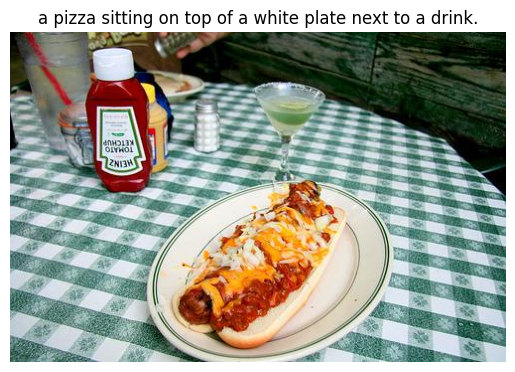

In [58]:
from PIL import Image

image_path = "/kaggle/working/test_external.jpg"
image = Image.open(image_path).convert("RGB")

caption = caption_image(image, encoder, decoder, word_map, device)
print("📝 Caption:", caption)

import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis("off")
plt.title(caption)
plt.show()